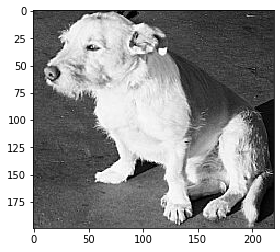

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array) 


[[ 69  60  69 ...  42  44  45]
 [ 69  57  64 ...  44  48  51]
 [ 56  47  61 ...  39  43  45]
 ...
 [ 98  86  77 ...  47  59  79]
 [ 92 102 100 ...  71  76  85]
 [ 95  94  79 ...  77  73  74]]


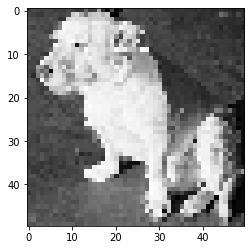

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:09<00:00, 1341.96it/s]

24946


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
0
1
1
0
0


In [12]:
X = []
y = []


In [13]:
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()






In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


array([[[ 77],
        [ 85],
        [ 84],
        ...,
        [ 43],
        [ 56],
        [ 64]],

       [[ 77],
        [ 86],
        [ 83],
        ...,
        [ 92],
        [125],
        [129]],

       [[ 76],
        [ 87],
        [ 89],
        ...,
        [ 97],
        [136],
        [135]],

       ...,

       [[ 65],
        [ 86],
        [ 63],
        ...,
        [ 46],
        [ 48],
        [ 34]],

       [[ 61],
        [ 67],
        [ 71],
        ...,
        [ 56],
        [ 44],
        [ 38]],

       [[ 62],
        [ 59],
        [ 82],
        ...,
        [ 57],
        [ 41],
        [ 49]]], dtype=uint8)